In [ ]:
# GEREKLİ KÜTÜPHANELERİ YÜKLEME

# Veriyi okumak ve düzenlemek için pandas ve numpy kütüphaneleri
import pandas as pd
import numpy as np

# Grafik ve görselleştirme için matplotlib ve seaborn kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi ön işlemek için (etiketleme, ölçekleme) gereken kütüphaneler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Veriyi eğitim ve test olarak ayırmak ve çapraz doğrulama (cross validation) işlemleri için gerekenler
from sklearn.model_selection import train_test_split, cross_val_score

# Özellik seçimi (ANOVA) ve boyut indirgeme (PCA) için gerekli kütüphaneler
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif

# Değerlendirme metrikleri (confusion matrix, accuracy, classification report, ROC-AUC vs.) için
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Makine öğrenmesi modelleri:
from sklearn.tree import DecisionTreeClassifier          # Karar Ağacı
from sklearn.neighbors import KNeighborsClassifier       # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB               # Naive Bayes
from sklearn.svm import SVC                              # Support Vector Machine (SVM)
from sklearn.linear_model import LogisticRegression      # Lojistik Regresyon
from sklearn.ensemble import RandomForestClassifier      # Random Forest
from sklearn.neural_network import MLPClassifier         # Yapay Sinir Ağı (ANN - Multi Layer Perceptron)

# Eğitim sürelerini ölçmek için zaman kütüphanesi
import time


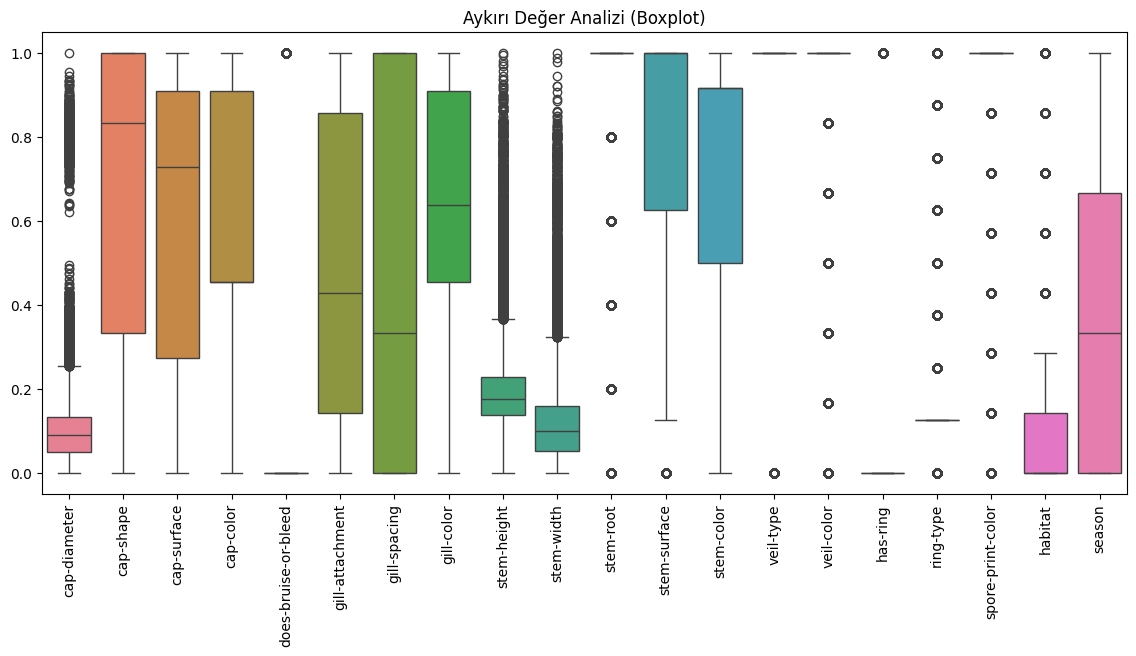

Ön işleme başarıyla tamamlandı.


In [ ]:
# VERİYİ YÜKLEME ve ÖN İŞLEME

# Pandas ve numpy kütüphaneleri ile veri işleme işlemleri yapılacak
import pandas as pd
import numpy as np

# Etiketleme ve ölçekleme işlemleri için gerekli kütüphaneler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

# Görselleştirme için kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns

# CSV formatındaki veri dosyasını oku. "delimiter" olarak ; kullandık çünkü dosyada sütunlar ; ile ayrılmış.
data = pd.read_csv("secondary_data.csv", delimiter=";")

# Eksik değerleri doldur. Sayısal sütunlar için boş (NaN) değerleri o sütunun ortalama değeri ile dolduruyoruz.
data.fillna(data.mean(numeric_only=True), inplace=True)

# Hedef değişkeni (class sütunu) ayırıyoruz. Bu sütun sınıflandırma hedefimiz olacak.
y = data["class"]

# Hedef değişkeni sayısal hale getirme: "e" (edible - yenilebilir) → 0, "p" (poisonous - zehirli) → 1
y = y.map({'e': 0, 'p': 1})

# Özellikleri (bağımsız değişkenleri) alıyoruz
X = data.drop("class", axis=1)

# Kategorik değişkenleri tespit et (dtype = object olan sütunlar kategoriktir)
categorical_cols = X.select_dtypes(include="object").columns

# Kategorik verileri sayısal hale getirme (Label Encoding yöntemi).
# Her kategoriye bir sayı veriyoruz. OneHot yerine seçildi çünkü LabelEncoding aykırı değer analizi ve ROC için daha uygundur.
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalizasyon işlemi yapıyoruz. MinMaxScaler verileri 0-1 arasına getirerek modellerin daha dengeli çalışmasını sağlar.
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Aykırı Değer Analizi: Boxplot kullanarak veride aşırı büyük/küçük (outlier) değerleri görselleştiriyoruz.
plt.figure(figsize=(14, 6))
sns.boxplot(data=X)
plt.title("Aykırı Değer Analizi (Boxplot)")
plt.xticks(rotation=90)
plt.show()

# Ön işleme süreci bittiğine dair bilgi mesajı
print("Ön işleme başarıyla tamamlandı.")


Seçilen Özellikler:
 ['stem-width' 'cap-diameter' 'stem-surface' 'spore-print-color'
 'stem-height' 'cap-shape' 'stem-color' 'veil-color' 'gill-color'
 'has-ring' 'season' 'veil-type' 'habitat' 'cap-surface' 'ring-type']


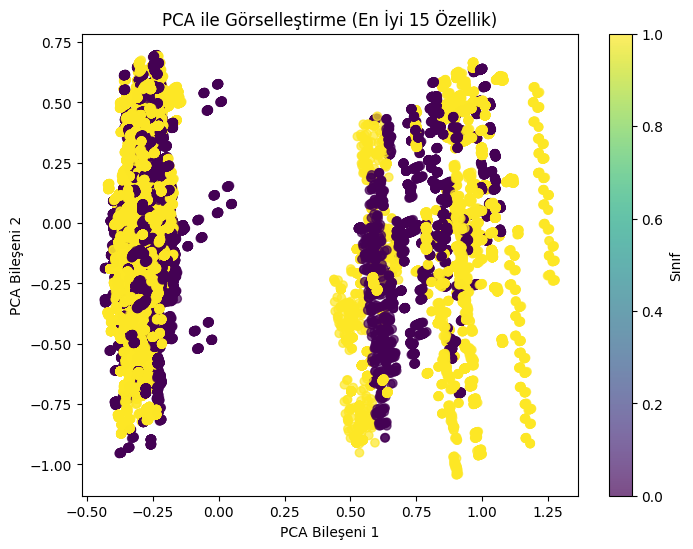

In [ ]:
#  ÖZELLİK SEÇİMİ (ANOVA) + PCA

# ANOVA (f_classif) ile özelliklerin sınıfları ayırmadaki önemini ölçmek için F-Skorları hesaplıyoruz.
# Bu yöntem her özelliğin hedef değişken ile istatistiksel ilişkisini değerlendirir.
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA

# ANOVA analizi ile en önemli 15 özelliği belirle
anova = f_classif(X, y)

# Özellikleri F-Score değerlerine göre sıralıyoruz
anova_df = pd.DataFrame({
    "Feature": X.columns,
    "F-Score": anova[0]
}).sort_values("F-Score", ascending=False)

# En yüksek F-Skoruna sahip 15 özelliği seçiyoruz
selected_features = anova_df["Feature"].head(15).values

# Seçilen özellikleri X_selected değişkenine aktarıyoruz
X_selected = X[selected_features]

# Seçilen özellikleri ekrana yazdır
print("Seçilen Özellikler:\n", selected_features)

# PCA (Principal Component Analysis - Temel Bileşenler Analizi) uyguluyoruz.
# Amaç: Seçilen 15 özelliği 2 boyuta indirerek görselleştirmek (model eğitiminden bağımsızdır, sadece görsel amaçlıdır).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# PCA sonucu iki boyutta görselleştiriliyor.
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA ile Görselleştirme (En İyi 15 Özellik)")
plt.xlabel("PCA Bileşeni 1")  # X ekseni
plt.ylabel("PCA Bileşeni 2")  # Y ekseni
plt.colorbar(label='Sınıf')   # Hangi renk hangi sınıfı gösteriyor
plt.show()


In [ ]:
# MODELLERİN TANIMLANMASI ve VERİ BÖLME

# Kütüphaneleri içe aktarma (Model seçiminde kullanılacak algoritmalar)
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# K-Fold Cross Validation tanımlıyoruz.
# Amaç: Veriyi 5 parçaya (fold) bölerek her bir parçayı hem eğitim hem de test için kullanmak.
# Bu, modelin genel performansını daha güvenilir ölçmemizi sağlar.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kullanılacak modelleri bir sözlük (dictionary) yapısında tanımlıyoruz.
# Böylece modelleri döngü ile kolayca çalıştırabileceğiz.
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42),  # Overfitting'i engellemek için sınırlamalar getirildi.
    "KNN": KNeighborsClassifier(n_neighbors=25, weights='distance'),  # Komşu sayısı ve ağırlık yöntemi belirlendi.
    "Naive Bayes": GaussianNB(),  # Basit ve hızlı bir yöntem, varsayımsal dağılımı kullanır.
    "SVM": SVC(probability=True, kernel='rbf', C=1.0, random_state=42),  # Kernel yöntemi ve sabit C değeriyle tanımlandı.
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Max iter ayarlanarak optimizasyon sağlandı.
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=20, random_state=42),  # Ağaç sayısı ve derinliği ayarlandı, overfitting önlemi.
    "ANN": MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, alpha=0.01, early_stopping=True, random_state=42)  # Katman yapısı ve erken durdurma ile aşırı öğrenme engellenmeye çalışıldı.
}

# Tanımlanan modellerin hazır olduğunu belirtiyoruz.
print("Modeller başarıyla tanımlandı ve veriler hazırlandı.")


Modeller başarıyla tanımlandı ve veriler hazırlandı.



Decision Tree Ortalama Sonuçlar:
----------------------
Ortalama Accuracy:  0.825558111438564
Ortalama Precision:  0.8803135583877115
Ortalama Recall:  0.7965001315360436
Ortalama F1 Score:  0.8344337058242315
Ortalama AUC:  0.9231832945223062

Ortalama Confusion Matrix:
[[4682  754]
 [1376 5401]]


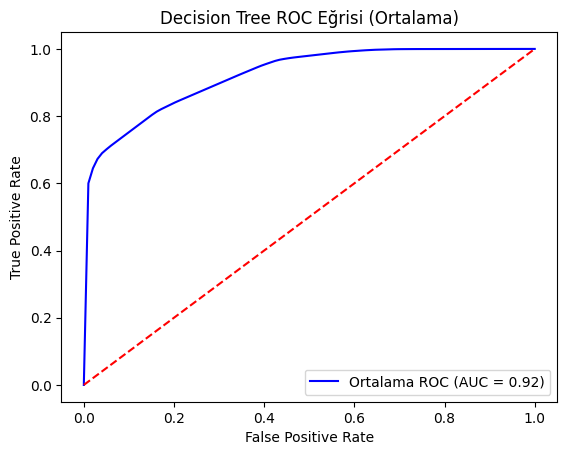

In [ ]:
# DECISION TREE MODELİ

from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Decision Tree modelini belirli hiperparametrelerle tanımlıyoruz.
# max_depth ve min_samples_split aşırı öğrenmeyi (overfitting) engellemek için sınırlandırıldı.
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

# K-Fold Cross Validation uyguluyoruz.
# Veriyi 5 parçaya bölecek ve her parçayı sırayla test seti olarak kullanacağız.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans metrikleri ve ROC eğrisi için gerekli listeleri tanımlıyoruz.
tprs = []                # True Positive Rate değerleri (ROC eğrisi için)
aucs = []                # AUC değerleri
accuracies = []          # Doğruluk oranları
precisions = []          # Precision oranları
recalls = []             # Recall oranları
f1_scores = []           # F1-score oranları
conf_matrices = []       # Confusion matrix'ler

# ROC eğrisi için ortalama False Positive Rate değerlerini oluşturuyoruz.
mean_fpr = np.linspace(0, 1, 100)

# K-Fold döngüsü başlıyor.
for train_index, test_index in kf.split(X_selected):

    # Eğitim ve test verilerini bölüyoruz.
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Modeli eğitiyoruz.
    model.fit(X_train, y_train)

    # Tahmin yapıyoruz.
    y_pred = model.predict(X_test)

    # ROC eğrisi ve AUC için tahmin olasılıklarını alıyoruz.
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    # ROC eğrisi ve AUC hesaplama
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # ROC eğrisi için TPR değerlerini ortalamak amacıyla interpolasyon yapıyoruz.
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    # Diğer metrikleri hesaplıyoruz.
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # Hesaplanan metrikleri listelere ekliyoruz.
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(cm)

print("\nDecision Tree Ortalama Sonuçlar:")
print("----------------------")
print("Ortalama Accuracy: ", np.mean(accuracies))
print("Ortalama Precision: ", np.mean(precisions))
print("Ortalama Recall: ", np.mean(recalls))
print("Ortalama F1 Score: ", np.mean(f1_scores))
print("Ortalama AUC: ", np.mean(aucs))

# Ortalama Confusion Matrix hesaplanıyor ve yazdırılıyor.
avg_cm = np.mean(conf_matrices, axis=0).round().astype(int)
print("\nOrtalama Confusion Matrix:")
print(avg_cm)

# Ortalamaları alınmış TPR ve FPR değerleri ile ROC eğrisini çiziyoruz.
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Ortalama ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Referans çizgisi (model tamamen rastgele tahmin yapsaydı)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Eğrisi (Ortalama)")
plt.legend(loc="lower right")
plt.show()


KNN Ortalama Sonuçları
----------------------------
Ortalama Accuracy: 0.9966758893244068
Ortalama Precision: 0.9976331923255234
Ortalama Recall: 0.9963733587367335
Ortalama F1-Score: 0.9970024790042963
Ortalama AUC: 0.9998261720030209

Ortalama Confusion Matrix:
[[27101    80]
 [  123 33765]]


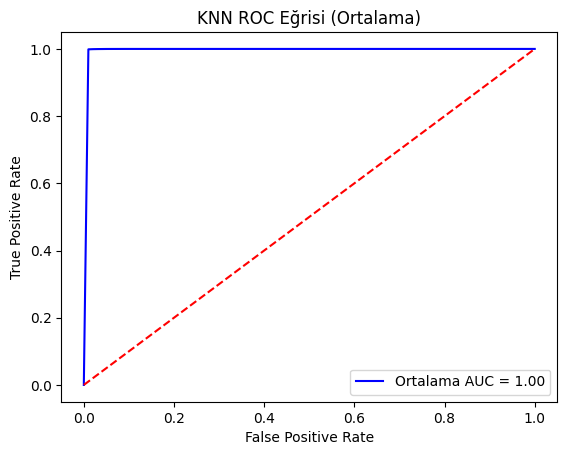

In [ ]:
# KNN MODELİ

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import time

# K-Fold Cross Validation başlatılıyor.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans metrikleri ve ROC eğrisi için listeler oluşturuluyor.
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
conf_matrices = []
all_fpr = []
all_tpr = []

# K-Fold döngüsü başlatılıyor.
for fold, (train_index, test_index) in enumerate(kf.split(X_selected)):
    # Eğitim ve test verileri bölünüyor.
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # KNN modelini oluşturuyoruz.
    # weights='distance' -> Daha yakın komşulara daha fazla ağırlık verilerek tahmin yapılacak.
    model = KNeighborsClassifier(n_neighbors=25, weights='distance')

    # Model eğitimi başlatılıyor ve süre ölçülüyor.
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Test verisi ile tahmin yapılıyor.
    y_pred = model.predict(X_test)

    # ROC eğrisi için tahmin olasılıkları alınıyor.
    y_proba = model.predict_proba(X_test)[:, 1]

    # Temel metrikler hesaplanıyor.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC eğrisi için FPR ve TPR değerleri alınıyor.
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # ROC eğrisinin grafik sorununu önlemek için tekrar eden değerleri kaldırıyoruz.
    fpr, unique_indices = np.unique(fpr, return_index=True)
    tpr = tpr[unique_indices]

    # AUC hesaplanıyor.
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix hesaplanıyor.
    cm = confusion_matrix(y_test, y_pred)

    # Hesaplanan değerler ilgili listelere ekleniyor.
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)
    conf_matrices.append(cm)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# 5 katlı K-Fold sonrasında tüm metriklerin ortalaması alınıyor.
mean_acc = np.mean(accuracies)
mean_prec = np.mean(precisions)
mean_rec = np.mean(recalls)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)
mean_cm = np.sum(conf_matrices, axis=0)

# Sonuçlar yazdırılıyor.
print("KNN Ortalama Sonuçları")
print("----------------------------")
print("Ortalama Accuracy:", mean_acc)
print("Ortalama Precision:", mean_prec)
print("Ortalama Recall:", mean_rec)
print("Ortalama F1-Score:", mean_f1)
print("Ortalama AUC:", mean_auc)

# Ortalama Confusion Matrix yazdırılıyor.
print("\nOrtalama Confusion Matrix:")
print(mean_cm.astype(int))

# ROC eğrisini çizmek için ortalama FPR aralıkları oluşturuluyor.
mean_fpr = np.linspace(0, 1, 100)
tprs_interp = []

# Her kat için TPR değerleri yeniden örnekleniyor ve ortalaması alınacak.
for fpr, tpr in zip(all_fpr, all_tpr):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs_interp.append(tpr_interp)

# Ortalama TPR hesaplanıyor.
mean_tpr = np.mean(tprs_interp, axis=0)

# ROC eğrisi çiziliyor.
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Rastgele sınıflandırmanın referans çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Eğrisi (Ortalama)")
plt.legend()

# Grafik daha temiz görünsün diye grid kapalı.
plt.grid(False)
plt.show()


Naive Bayes Ortalama Sonuçları
----------------------------
Ortalama Accuracy: 0.593820006816135
Ortalama Precision: 0.6745857432670161
Ortalama Recall: 0.5179029085734763
Ortalama F1-Score: 0.5859101364347274
Ortalama AUC: 0.6590445099200549

Ortalama Confusion Matrix:
[[18714  8467]
 [16338 17550]]


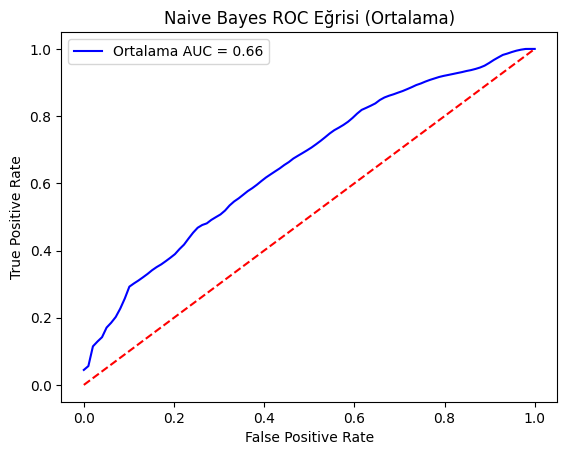

In [ ]:
# NAIVE BAYES MODELİ

from sklearn.naive_bayes import GaussianNB

# K-Fold Cross Validation başlatılıyor (veriyi 5 parçaya bölerek her modelin farklı veri ile test edilmesini sağlıyor)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans metriklerini ve ROC eğrisi değerlerini depolamak için boş listeler hazırlanıyor.
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
conf_matrices = []
all_fpr = []
all_tpr = []

# K-Fold döngüsü başlatılıyor.
for fold, (train_index, test_index) in enumerate(kf.split(X_selected)):

    # Eğitim ve test verileri ayrılıyor.
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Gaussian Naive Bayes modeli oluşturuluyor.
    model = GaussianNB()

    # Model eğitimi başlıyor ve süre ölçülüyor.
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Tahmin işlemi yapılıyor.
    y_pred = model.predict(X_test)

    # ROC eğrisi için tahmin olasılıkları alınıyor.
    y_proba = model.predict_proba(X_test)[:, 1]

    # Temel metrikler hesaplanıyor.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC eğrisi için FPR ve TPR değerleri hesaplanıyor.
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix oluşturuluyor.
    cm = confusion_matrix(y_test, y_pred)

    # Tüm hesaplanan değerler listelere kaydediliyor.
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)
    conf_matrices.append(cm)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# K-Fold sonrasında ortalama değerler hesaplanıyor.
mean_acc = np.mean(accuracies)
mean_prec = np.mean(precisions)
mean_rec = np.mean(recalls)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)
mean_cm = np.sum(conf_matrices, axis=0)

# Ortalama sonuçlar ekrana yazdırılıyor.
print("Naive Bayes Ortalama Sonuçları")
print("----------------------------")
print("Ortalama Accuracy:", mean_acc)
print("Ortalama Precision:", mean_prec)
print("Ortalama Recall:", mean_rec)
print("Ortalama F1-Score:", mean_f1)
print("Ortalama AUC:", mean_auc)

# Ortalama Confusion Matrix yazdırılıyor.
print("\nOrtalama Confusion Matrix:")
print(mean_cm.astype(int))

# ROC eğrisi için ortalama FPR değerleri tanımlanıyor.
mean_fpr = np.linspace(0, 1, 100)
tprs_interp = []

# Katlar arasında TPR değerleri interpolate edilerek ortalama alınacak.
for fpr, tpr in zip(all_fpr, all_tpr):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs_interp.append(tpr_interp)

# Ortalama TPR hesaplanıyor.
mean_tpr = np.mean(tprs_interp, axis=0)

# ROC eğrisi çiziliyor.
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Rastgele sınıflandırma referans çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Eğrisi (Ortalama)")
plt.legend()
plt.show()


SVM Ortalama Sonuçları
----------------------------------------
Ortalama Accuracy: 0.8360214872761393
Ortalama Precision: 0.8455573269092067
Ortalama Recall: 0.8620040569165053
Ortalama F1-Score: 0.8536652762712297
Ortalama AUC: 0.9240540169526487

Ortalama Confusion Matrix:
[[21845  5336]
 [ 4678 29210]]


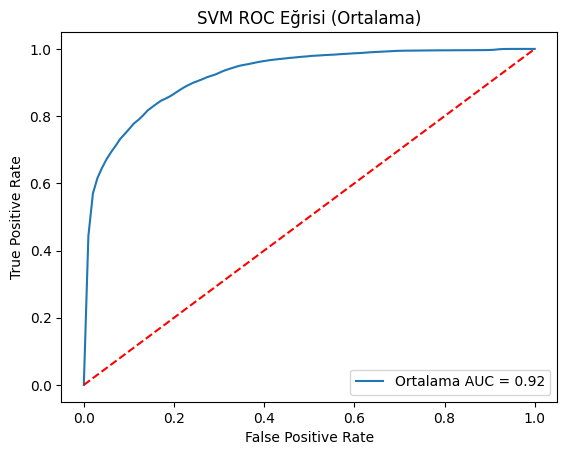

In [ ]:
# SVM MODELİ

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# K-Fold Cross Validation başlatılıyor (5 parçalı)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans metrikleri ve ROC eğrisi için boş listeler ve değişkenler tanımlandı.
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
conf_matrix_sum = np.zeros((2, 2))  # Confusion Matrix'in ortalamasını tutacak.

tprs = []
mean_fpr = np.linspace(0, 1, 100)  # ROC için ortak x ekseni tanımlandı.

# K-Fold döngüsü başlıyor
for train_index, test_index in kf.split(X_selected):

    # Eğitim ve test verisi ayrımı yapılıyor.
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SVM modeli oluşturuluyor. (probability=False → Daha hızlı çalışır, ROC için decision_function kullanılacak)
    model = SVC(kernel='rbf', C=1.0, random_state=42)

    # Model eğitiliyor.
    model.fit(X_train, y_train)

    # Tahmin işlemi
    y_pred = model.predict(X_test)

    # ROC için decision_function kullanılıyor (Sınıflandırma skorları sağlar → hızlı ve uygundur)
    y_scores = model.decision_function(X_test)

    # Performans metrikleri hesaplanıyor.
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_scores))

    # Confusion Matrix toplanıyor (Ortalama için)
    conf_matrix_sum += confusion_matrix(y_test, y_pred)

    # ROC eğrisi için FPR ve TPR hesaplanıyor.
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    # ROC eğrisi ortalama için interpolate ediliyor ve kaydediliyor.
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

print("SVM Ortalama Sonuçları")
print("-" * 40)
print("Ortalama Accuracy:", np.mean(accuracy_list))
print("Ortalama Precision:", np.mean(precision_list))
print("Ortalama Recall:", np.mean(recall_list))
print("Ortalama F1-Score:", np.mean(f1_list))
print("Ortalama AUC:", np.mean(auc_list))

# Ortalama Confusion Matrix gösteriliyor.
print("\nOrtalama Confusion Matrix:")
print(conf_matrix_sum.astype(int))

# ROC eğrisi için ortalama TPR hesaplanıyor.
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # ROC eğrisi 1.0'da bitmeli.

# Ortalama AUC değeri hesaplanıyor.
mean_auc = auc(mean_fpr, mean_tpr)

# ROC eğrisi görselleştiriliyor.
plt.figure()
plt.plot(mean_fpr, mean_tpr, label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Referans çizgisi (rastgele tahmin)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Eğrisi (Ortalama)")
plt.legend(loc="lower right")
plt.show()


Random Forest Ortalama Sonuçları
----------------------------
Ortalama Accuracy: 0.9437520901546804
Ortalama Precision: 0.9892369300676954
Ortalama Recall: 0.9086006389578895
Ortalama F1-Score: 0.9471552785712554
Ortalama AUC: 0.9933694231691177

Ortalama Confusion Matrix:
[[26846   335]
 [ 3100 30788]]


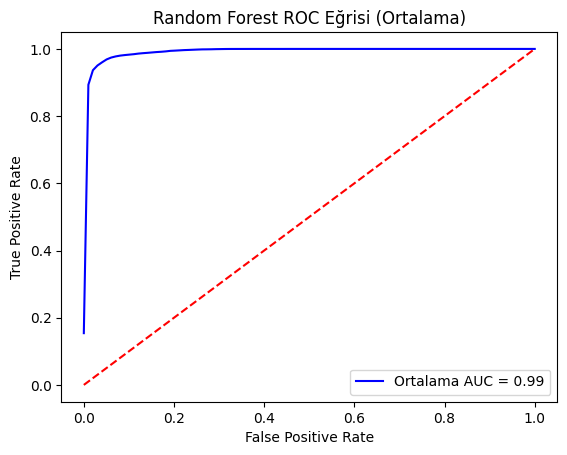

In [ ]:
# RANDOM FOREST MODELİ

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import time

# 5 Katlı (5-fold) K-Fold Cross Validation başlatılıyor
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans ölçümleri için boş listeler oluşturuluyor
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
conf_matrices = []
all_fpr = []
all_tpr = []

# K-Fold döngüsü başlatılıyor
for fold, (train_index, test_index) in enumerate(kf.split(X_selected)):

    # Eğitim ve test verileri belirleniyor
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest modeli tanımlanıyor (hiperparametrelerle birlikte)
    model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10, random_state=42)

    # Modelin eğitimi başlıyor
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Model tahmin yapıyor
    y_pred = model.predict(X_test)

    # ROC eğrisi için olasılık tahminleri alınıyor
    y_proba = model.predict_proba(X_test)[:, 1]

    # Performans metrikleri hesaplanıyor
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC Eğrisi için FPR ve TPR hesaplanıyor
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # ROC eğrisi düzgün çıksın diye fpr ve tpr düzenleniyor (0 ve 1 noktaları garantiye alınıyor)
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]

    if fpr[0] > 0.0:
        fpr = np.insert(fpr, 0, 0.0)
        tpr = np.insert(tpr, 0, 0.0)
    if fpr[-1] < 1.0:
        fpr = np.append(fpr, 1.0)
        tpr = np.append(tpr, 1.0)

    # AUC değeri hesaplanıyor
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix (karmaşıklık matrisi) hesaplanıyor
    cm = confusion_matrix(y_test, y_pred)

    # Hesaplanan metrikler listelere ekleniyor
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)
    conf_matrices.append(cm)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Tüm katlamalar için ortalama metrikler hesaplanıyor
mean_acc = np.mean(accuracies)
mean_prec = np.mean(precisions)
mean_rec = np.mean(recalls)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

# Ortalama Confusion Matrix
mean_cm = np.sum(conf_matrices, axis=0)

# Sonuçlar yazdırılıyor
print("Random Forest Ortalama Sonuçları")
print("----------------------------")
print("Ortalama Accuracy:", mean_acc)
print("Ortalama Precision:", mean_prec)
print("Ortalama Recall:", mean_rec)
print("Ortalama F1-Score:", mean_f1)
print("Ortalama AUC:", mean_auc)
print("\nOrtalama Confusion Matrix:")
print(mean_cm.astype(int))

# ROC eğrisi için tüm katlamalardan ortalama TPR hesaplanıyor
mean_fpr = np.linspace(0, 1, 100)
tprs_interp = []

for fpr, tpr in zip(all_fpr, all_tpr):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs_interp.append(tpr_interp)

mean_tpr = np.mean(tprs_interp, axis=0)

# ROC eğrisi görselleştiriliyor
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin eğrisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Eğrisi (Ortalama)")
plt.legend()
plt.grid(False)  # Arka planı sade yapmak için grid kapalı
plt.show()


ANN Ortalama Sonuçları
----------------------------
Ortalama Accuracy: 0.9738657496539742
Ortalama Precision: 0.9756676808320754
Ortalama Recall: 0.9773506107021543
Ortalama F1-Score: 0.9765022284470515
Ortalama AUC: 0.9965956325963873

Ortalama Confusion Matrix:
[[26354   827]
 [  769 33119]]


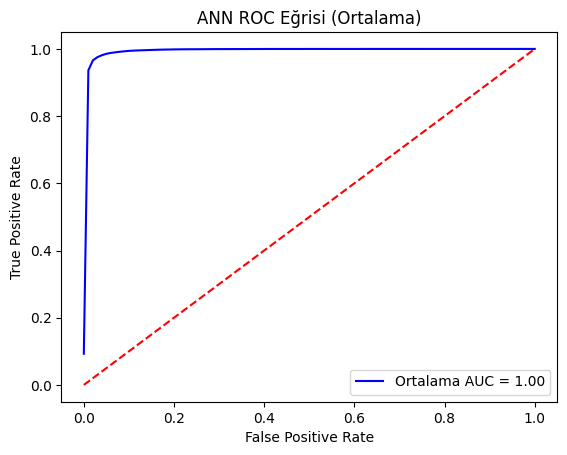

In [ ]:
# ANN MODELİ

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import time

# 5 katlı K-Fold Cross Validation başlatılıyor
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans sonuçları için boş listeler tanımlanıyor
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
conf_matrices = []
all_fpr = []
all_tpr = []

# K-Fold döngüsü başlıyor
for fold, (train_index, test_index) in enumerate(kf.split(X_selected)):

    # Eğitim ve test verileri ayrılıyor
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # ANN modeli tanımlanıyor
    # hidden_layer_sizes=(50, 25) → 2 gizli katman (50 ve 25 nöronlu)
    # max_iter=500 → maksimum iterasyon sayısı
    # alpha=0.01 → L2 cezalandırma terimi (overfitting'e karşı)
    # early_stopping=True → Eğitim durdurulabilir
    model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, alpha=0.01, early_stopping=True, random_state=42)

    # Model eğitiliyor
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Tahminler yapılıyor
    y_pred = model.predict(X_test)

    # ROC eğrisi için olasılık değerleri alınıyor
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrikler hesaplanıyor
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC eğrisi ve AUC hesaplanıyor
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # ROC eğrisi düzgün gözüksün diye başa ve sona 0 ve 1 ekleniyor
    fpr = np.concatenate(([0], fpr, [1]))
    tpr = np.concatenate(([0], tpr, [1]))

    # Sıralama işlemi ile ROC eğrisindeki olası düzensizlik gideriliyor
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]

    roc_auc = auc(fpr, tpr)

    # Confusion Matrix hesaplanıyor
    cm = confusion_matrix(y_test, y_pred)

    # Sonuçlar listelere ekleniyor
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)
    conf_matrices.append(cm)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Ortalama metrik değerleri hesaplanıyor
mean_acc = np.mean(accuracies)
mean_prec = np.mean(precisions)
mean_rec = np.mean(recalls)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)

# Ortalama Confusion Matrix
mean_cm = np.sum(conf_matrices, axis=0)

# Sonuçlar ekrana yazdırılıyor
print("ANN Ortalama Sonuçları")
print("----------------------------")
print("Ortalama Accuracy:", mean_acc)
print("Ortalama Precision:", mean_prec)
print("Ortalama Recall:", mean_rec)
print("Ortalama F1-Score:", mean_f1)
print("Ortalama AUC:", mean_auc)
print("\nOrtalama Confusion Matrix:")
print(mean_cm.astype(int))

# ROC eğrisi için tüm katlamalardan ortalama TPR hesaplanıyor
mean_fpr = np.linspace(0, 1, 100)
tprs_interp = []

for fpr, tpr in zip(all_fpr, all_tpr):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs_interp.append(tpr_interp)

mean_tpr = np.mean(tprs_interp, axis=0)

# ROC eğrisi görselleştiriliyor
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin eğrisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ANN ROC Eğrisi (Ortalama)")
plt.legend()
plt.grid(False)  # Arka plan sadeleştirildi
plt.show()


Logistic Regression Ortalama Sonuçları
----------------------------
Ortalama Accuracy: 0.6374265780271476
Ortalama Precision: 0.6494510583616862
Ortalama Recall: 0.753214739808205
Ortalama F1-Score: 0.6974663248683963
Ortalama AUC: 0.6826537605502974

Ortalama Confusion Matrix:
[[13402 13779]
 [ 8363 25525]]


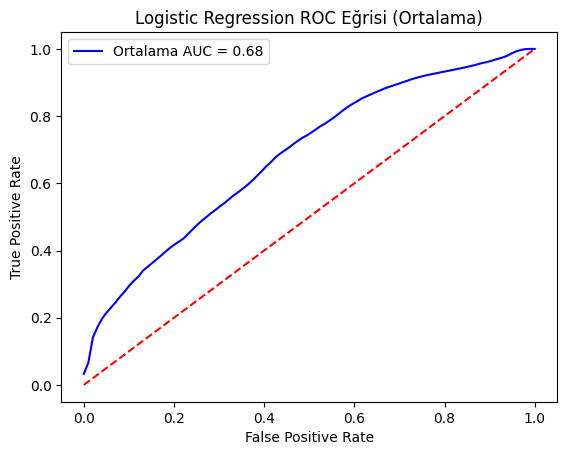

In [ ]:
# LOGISTIC REGRESSION MODELİ

from sklearn.linear_model import LogisticRegression

# 5 katlı K-Fold Cross Validation başlatılıyor
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans ölçümleri için boş listeler tanımlanıyor
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []
conf_matrices = []
all_fpr = []
all_tpr = []

# K-Fold ile model eğitimi ve değerlendirme
for fold, (train_index, test_index) in enumerate(kf.split(X_selected)):

    # Eğitim ve test verileri belirleniyor
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression modeli tanımlanıyor
    model = LogisticRegression(max_iter=1000, random_state=42)

    # Model eğitiliyor
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Tahmin yapılıyor
    y_pred = model.predict(X_test)

    # ROC eğrisi için olasılık tahminleri alınıyor
    y_proba = model.predict_proba(X_test)[:, 1]

    # Performans metrikleri hesaplanıyor
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC eğrisi ve AUC değeri hesaplanıyor
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Confusion Matrix hesaplanıyor
    cm = confusion_matrix(y_test, y_pred)

    # Sonuçlar listelere ekleniyor
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)
    conf_matrices.append(cm)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

mean_acc = np.mean(accuracies)
mean_prec = np.mean(precisions)
mean_rec = np.mean(recalls)
mean_f1 = np.mean(f1_scores)
mean_auc = np.mean(auc_scores)
mean_cm = np.sum(conf_matrices, axis=0)

# Ortalama değerler ekrana yazdırılıyor
print("Logistic Regression Ortalama Sonuçları")
print("----------------------------")
print("Ortalama Accuracy:", mean_acc)
print("Ortalama Precision:", mean_prec)
print("Ortalama Recall:", mean_rec)
print("Ortalama F1-Score:", mean_f1)
print("Ortalama AUC:", mean_auc)
print("\nOrtalama Confusion Matrix:")
print(mean_cm.astype(int))

# ROC eğrisinin ortalama hali için interpolasyon yapılıyor
mean_fpr = np.linspace(0, 1, 100)
tprs_interp = []

for fpr, tpr in zip(all_fpr, all_tpr):
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs_interp.append(tpr_interp)

mean_tpr = np.mean(tprs_interp, axis=0)

# ROC eğrisi görselleştiriliyor
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f"Ortalama AUC = {mean_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  # Rastgele sınıflandırıcı çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Eğrisi (Ortalama)")
plt.legend()
plt.show()


Modellerin Performans Özeti:


,Accuracy,Precision,Recall,F1 Score,AUC
Decision Tree,0.8255,0.8803,0.7965,0.8344,0.9231
KNN,0.9966,0.9976,0.9963,0.9970,0.9998
Naive Bayes,0.5938,0.6745,0.5179,0.5859,0.6590
SVM,0.8360,0.8455,0.8620,0.8536,0.9240
Random Forest,0.9437,0.9892,0.9086,0.9471,0.9933
ANN,0.9738,0.9756,0.9773,0.9765,0.9965
Logistic Regression,0.6374,0.6494,0.7532,0.6974,0.6826


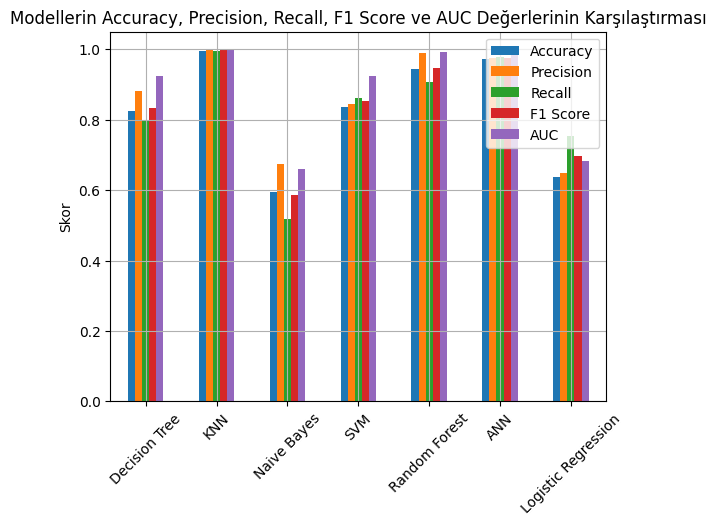

In [ ]:
# MODELLERİN PERFORMANS KARŞILAŞTIRILMASI

import pandas as pd
import matplotlib.pyplot as plt

# Modellerin tüm performans metrikleri daha önceden hesaplandığı için manuel olarak giriliyor.
# Bu değerler, Accuracy, Precision, Recall, F1 Score ve AUC gibi temel değerlendirme kriterlerini içeriyor.
results = {
    "Decision Tree": {
        "Accuracy": 0.8255,
        "Precision": 0.8803,
        "Recall": 0.7965,
        "F1 Score": 0.8344,
        "AUC": 0.9231,
    },
    "KNN": {
        "Accuracy": 0.9966,
        "Precision": 0.9976,
        "Recall": 0.9963,
        "F1 Score": 0.9970,
        "AUC": 0.9998,
    },
    "Naive Bayes": {
        "Accuracy": 0.5938,
        "Precision": 0.6745,
        "Recall": 0.5179,
        "F1 Score": 0.5859,
        "AUC": 0.6590,
    },
    "SVM": {
        "Accuracy": 0.8360,
        "Precision": 0.8455,
        "Recall": 0.8620,
        "F1 Score": 0.8536,
        "AUC": 0.9240,
    },
    "Random Forest": {
        "Accuracy": 0.9437,
        "Precision": 0.9892,
        "Recall": 0.9086,
        "F1 Score": 0.9471,
        "AUC": 0.9933,
    },
    "ANN": {
        "Accuracy": 0.9738,
        "Precision": 0.9756,
        "Recall": 0.9773,
        "F1 Score": 0.9765,
        "AUC": 0.9965,
    },
    "Logistic Regression": {
        "Accuracy": 0.6374,
        "Precision": 0.6494,
        "Recall": 0.7532,
        "F1 Score": 0.6974,
        "AUC": 0.6826,
    },
}

# Sonuçlar pandas DataFrame'e dönüştürülüyor
# Bu adım sayesinde tabloyu daha kolay görüntüleyebilir ve görselleştirme için kullanabiliriz
performans_df = pd.DataFrame(results).T

# Performans tablosu yazdırılıyor
print("Modellerin Performans Özeti:")
display(performans_df)

# Performans değerleri grafik olarak görselleştiriliyor
# Burada her model için Accuracy, Precision, Recall, F1 Score ve AUC değerleri gösterilecek
print("\n")
performans_df.plot(kind='bar')  # Çubuk grafik olarak çizdiriliyor
plt.title("Modellerin Accuracy, Precision, Recall, F1 Score ve AUC Değerlerinin Karşılaştırması")
plt.ylabel("Skor")
plt.ylim(0, 1.05)  # Y ekseni 0-1 arasında sınırlandırılıyor
plt.xticks(rotation=45)  # X eksenindeki yazılar 45 derece döndürülerek okunabilirlik artırılıyor
plt.grid(True)  # Grafik üzerine kılavuz çizgileri ekleniyor
plt.show()
